In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
data2 = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Financial-Analytics-Loan-Approval-Prediction/main/loan_prediction.csv")
data2.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
91,LP001318,Male,Yes,2,Graduate,No,6250,5654.0,188.0,180.0,1.0,Semiurban,Y
519,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
405,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data2.shape

(614, 13)

In [7]:
data2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

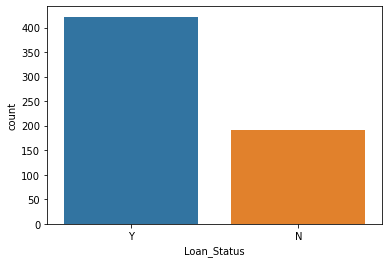

In [11]:
sb.countplot(x="Loan_Status",data= data2)

In [12]:
data2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:xlabel='Education', ylabel='count'>

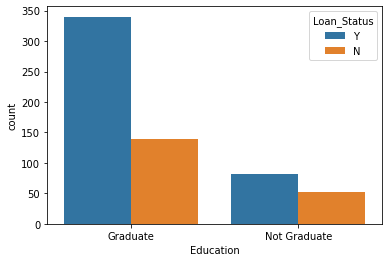

In [14]:
sb.countplot(x="Education",hue = "Loan_Status",data= data2)

<AxesSubplot:xlabel='Married', ylabel='count'>

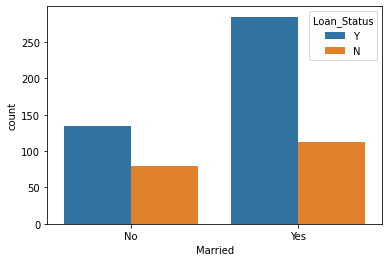

In [15]:
sb.countplot(x="Married",hue = "Loan_Status",data= data2)

<AxesSubplot:>

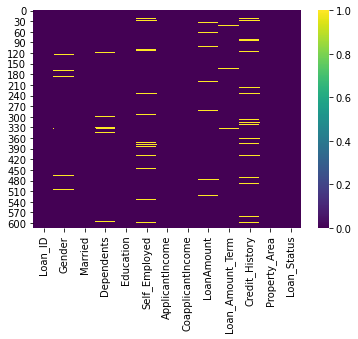

In [18]:
sb.heatmap(data2.isnull(),cmap="viridis")

In [19]:
# Fill all NAN values with respective mode values

data2["Gender"].fillna(data2["Gender"].mode()[0],inplace = True)
data2["Self_Employed"].fillna(data2["Self_Employed"].mode()[0],inplace = True)
data2["LoanAmount"].fillna(data2["LoanAmount"].mode()[0],inplace=True)
data2["Loan_Amount_Term"].fillna(data2["Loan_Amount_Term"].mode()[0],inplace = True)
data2["Credit_History"].fillna(data2["Credit_History"].mode()[0],inplace = True)
data2["Dependents"].fillna(data2["Dependents"].mode()[0],inplace=True)

<AxesSubplot:>

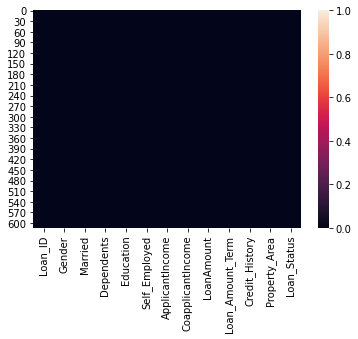

In [20]:
sb.heatmap(data2.isnull())

In [22]:
data2.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
172,LP001586,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,N
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,120.0,360.0,1.0,Rural,Y
479,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,120.0,360.0,1.0,Urban,N
436,LP002398,Male,No,0,Graduate,No,1926,1851.0,50.0,360.0,1.0,Semiurban,Y
33,LP001098,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
151,LP001529,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
301,LP001972,Male,Yes,0,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
209,LP001702,Male,No,0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban,N
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y


In [23]:
data2["Dependents"] = data2["Dependents"].replace("3+",int(3))
data2["dependents"] = data2["Dependents"].replace("2",int(2))
data2["Dependents"]=data2["Dependents"].replace("1",int(1))
data2["Dependents"]=data2["Dependents"].replace("0",int(0))

In [43]:
data2.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,dependents
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,N,0
88,LP001289,Male,No,0,Graduate,No,8566,0.0,210.0,360.0,1.0,Urban,Y,0
109,LP001384,Male,Yes,3,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y,3
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y,1
554,LP002789,Male,Yes,0,Graduate,No,3593,4266.0,132.0,180.0,0.0,Rural,N,0
188,LP001644,Male,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,0
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y,1
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural,N,0
162,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban,N,1
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y,0


In [44]:
data2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dependents            object
dtype: object

In [45]:
data2["Dependents"].dtypes

dtype('O')

In [46]:
data2.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dependents           0
dtype: int64

<AxesSubplot:>

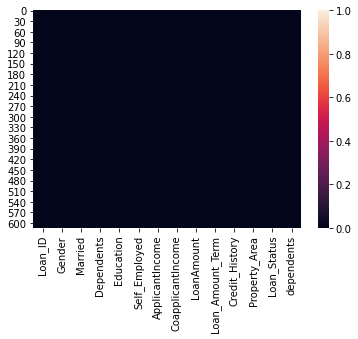

In [47]:
sb.heatmap(data2.isnull())

In [49]:
data2["Married"].fillna(data2["Married"].mode()[0],inplace = True)

In [52]:
data2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dependents           0
dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
data2["Gender"] = le.fit_transform(data2["Gender"])
data2["Married"] = le.fit_transform(data2["Married"])
data2["Education"] = le.fit_transform(data2["Education"])
data2["Self_Employed"] = le.fit_transform(data2["Self_Employed"])
data2["Property_Area"] = le.fit_transform(data2["Property_Area"])
data2["Loan_Status"] = le.fit_transform(data2["Loan_Status"])

# or by one hot encoding
# data2 = pd.get_dummies(data2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,dependents
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0


In [62]:
data2.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,dependents
215,LP001720,1,1,3,1,0,3850,983.0,100.0,360.0,1.0,1,1,3
173,LP001594,1,1,0,0,0,5708,5625.0,187.0,360.0,1.0,1,1,0
61,LP001206,1,1,3,0,0,3029,0.0,99.0,360.0,1.0,2,1,3
139,LP001493,1,1,2,1,0,4200,1430.0,129.0,360.0,1.0,0,0,2
367,LP002188,1,0,0,0,0,5124,0.0,124.0,360.0,0.0,0,0,0
43,LP001131,1,1,0,0,0,3941,2336.0,134.0,360.0,1.0,1,1,0
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,0
265,LP001875,1,0,0,0,0,4095,3447.0,151.0,360.0,1.0,0,1,0
70,LP001243,1,1,0,0,0,3208,3066.0,172.0,360.0,1.0,2,1,0
465,LP002494,1,0,0,0,0,6000,0.0,140.0,360.0,1.0,0,1,0


In [65]:
data2.drop(["Loan_ID"],axis = 1,inplace = True)


KeyError: "['Loan_ID'] not found in axis"

In [66]:
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,dependents
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1,0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0


In [67]:
X = data2.drop(["Loan_Status"],axis =1)
Y = data2["Loan_Status"]



In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state= 2)


In [70]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\amita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
predictions = model.predict(X_test)

In [72]:
predictions

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7837837837837838